In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

Simple Linear Regression without any models (Manual Calculation)

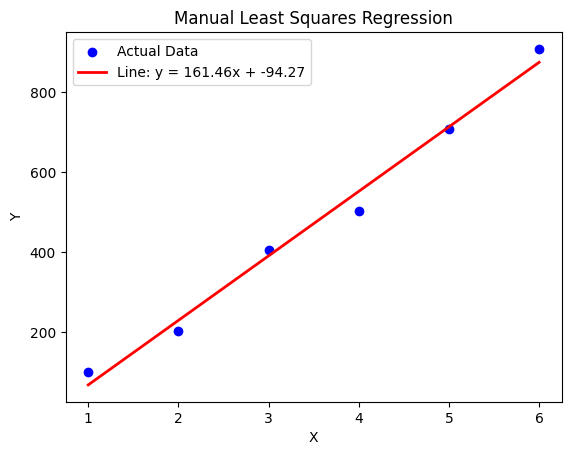

Final Equation: y = 161.46x + -94.27
Mean Squared Error: 942.6126984126983


In [3]:
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([100, 202, 406, 502, 707, 908])

def slope_const(x, y):
    N = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x2 = np.sum(x ** 2)

    m = (N * sum_xy - sum_x * sum_y) / (N * sum_x2 - sum_x ** 2)
    c = (sum_y - m * sum_x) / N
    return m, c

m, c = slope_const(x, y)

def y_pred(x_values):
    return m * np.array(x_values) + c

y_pred_values = y_pred(x)

error = mean_squared_error(y, y_pred_values)

plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, y_pred_values, color='red', linewidth=2, label=f'Line: y = {m:.2f}x + {c:.2f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Manual Least Squares Regression')
plt.legend()
plt.show()

print(f"Final Equation: y = {m:.2f}x + {c:.2f}")
print(f"Mean Squared Error: {error}")

Simple Linear Regression using Scikit-Learn


Simple Linear Regression Results Before Overfitting Check:
Coefficients: [[2.41972946]]
Intercept: [0.28582664]
Mean Squared Error: 2.6147980548680083
R-squared: 0.9545718935323327 



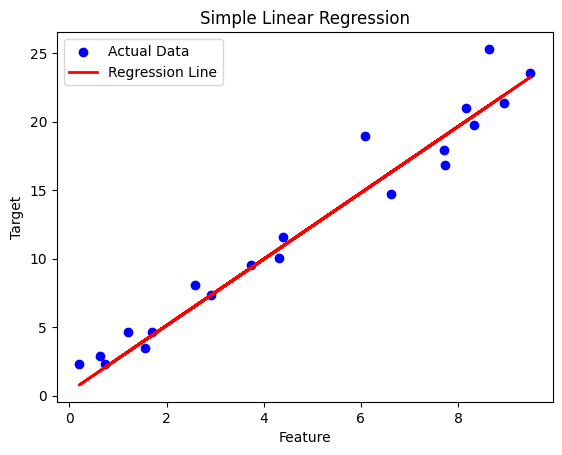


R-squared Train (SLR): 0.9360867457000046
R-squared Test (SLR): 0.9545718935323327
Overfitting in Simple Linear Regression: No


In [4]:
np.random.seed(42)
x = np.random.rand(100, 1) * 10
y = 2.5 * x + np.random.randn(100, 1) * 2

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

slr_model = LinearRegression()
slr_model.fit(x_train, y_train)

y_pred = slr_model.predict(x_test)

print("\nSimple Linear Regression Results Before Overfitting Check:")
print(f"Coefficients: {slr_model.coef_}")
print(f"Intercept: {slr_model.intercept_}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)} \n")

plt.scatter(x_test, y_test, color='blue', label='Actual Data')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

#Overfitting Check
r2_train_slr = r2_score(y_train, slr_model.predict(x_train))
r2_test_slr = r2_score(y_test, y_pred)
print(f"\nR-squared Train (SLR): {r2_train_slr}")
print(f"R-squared Test (SLR): {r2_test_slr}")
overfitting_slr = r2_train_slr > r2_test_slr
print(f"Overfitting in Simple Linear Regression: {'Yes' if overfitting_slr else 'No'}")

if overfitting_slr:
    ridge_model_slr = Ridge(alpha=1.0)
    ridge_model_slr.fit(x_train, y_train)
    y_pred_ridge_slr = ridge_model_slr.predict(x_test)
    print("\nRidge Regression Results for SLR:")
    print(f"Coefficients: {ridge_model_slr.coef_}")
    print(f"Intercept: {ridge_model_slr.intercept_}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_ridge_slr)}")
    print(f"R-squared: {r2_score(y_test, y_pred_ridge_slr)}")


Multiple Linear Regression Results Before Overfitting Check:
Coefficients: [3.01392255 1.56904233 2.02774402]
Intercept: -0.5707929491357149
Mean Squared Error: 6.338279616950365
R-squared: 0.9368006639825943 



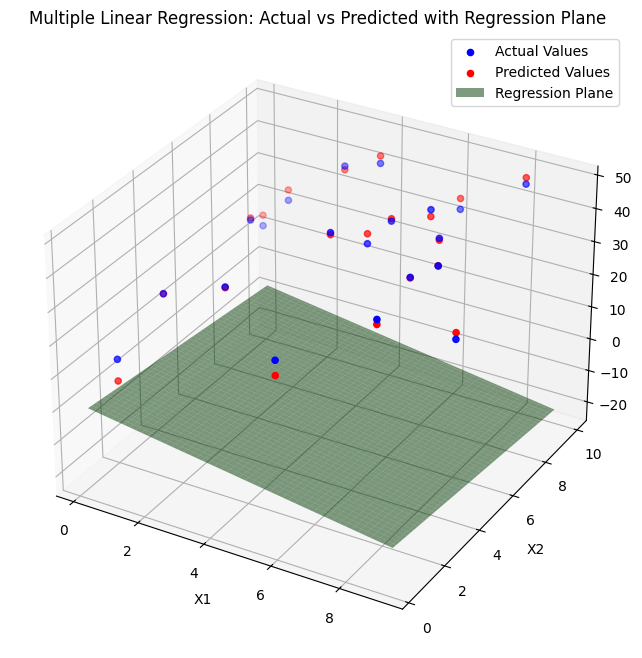


R-squared Train (MLR): 0.9726743869727515
R-squared Test (MLR): 0.9368006639825943
Overfitting in Multiple Linear Regression: Yes

Ridge Regression Results for MLR:
Coefficients: [3.00992392 1.56773478 2.02424847]
Intercept: -0.5254786888714236
Mean Squared Error: 6.324894725370734
R-squared: 0.9369341254755577


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic data
X = np.random.rand(100, 3) * 10
y_mlr = 3.0 * X[:, 0] + 1.5 * X[:, 1] + 2.0 * X[:, 2] + np.random.randn(100) * 2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_mlr, test_size=0.2, random_state=42)

# Fit the multiple linear regression model
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_mlr = mlr_model.predict(X_test)

# Print the results
print("\nMultiple Linear Regression Results Before Overfitting Check:")
print(f"Coefficients: {mlr_model.coef_}")
print(f"Intercept: {mlr_model.intercept_}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_mlr)}")
print(f"R-squared: {r2_score(y_test, y_pred_mlr)} \n")

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='blue', label='Actual Values')

ax.scatter(X_test[:, 0], X_test[:, 1], y_pred_mlr, color='red', label='Predicted Values')

x0, x1 = np.meshgrid(np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100),
                     np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 100))
x2 = (mlr_model.intercept_ + mlr_model.coef_[0] * x0 + mlr_model.coef_[1] * x1) / (-mlr_model.coef_[2])

# Plot the regression plane
ax.plot_surface(x0, x1, x2, color='green', alpha=0.5, label='Regression Plane')

# Set labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.set_title('Multiple Linear Regression: Actual vs Predicted with Regression Plane')

ax.legend()
plt.show()


#Overfitting Check
r2_train_mlr = r2_score(y_train, mlr_model.predict(X_train))
r2_test_mlr = r2_score(y_test, y_pred_mlr)
print(f"\nR-squared Train (MLR): {r2_train_mlr}")
print(f"R-squared Test (MLR): {r2_test_mlr}")
overfitting_mlr = r2_train_mlr > r2_test_mlr
print(f"Overfitting in Multiple Linear Regression: {'Yes' if overfitting_mlr else 'No'}")

if overfitting_mlr:
    ridge_model_mlr = Ridge(alpha=1.0)
    ridge_model_mlr.fit(X_train, y_train)
    y_pred_ridge_mlr = ridge_model_mlr.predict(X_test)
    print("\nRidge Regression Results for MLR:")
    print(f"Coefficients: {ridge_model_mlr.coef_}")
    print(f"Intercept: {ridge_model_mlr.intercept_}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_ridge_mlr)}")
    print(f"R-squared: {r2_score(y_test, y_pred_ridge_mlr)}")